# LINEAR MODELS

# 1. Ordinary Least Squares (Bình phương tối thiểu)
Với n samples, và m features, thì độ phức tạp là O(n.m^2). ||w|| được gọi là l1-norm regularization

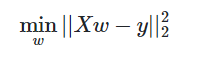

Coefficients: [945.4992184]
Mean square error: 3471.9231960569664


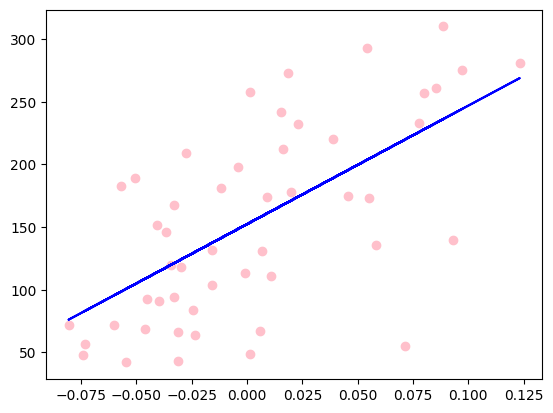

In [1]:
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)        # 1 bộ data gồm nhiều các vector nhiều chiều

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]   # Nó lấy 1 thuộc tính của 1 vector nhiều chiều ở vị trí 2 (tức a[i][2])

diabetes_X_train = diabetes_X[:-50]

diabetes_X_test = diabetes_X[-50:]
diabetes_y_train = diabetes_y[:-50]
diabetes_y_test = diabetes_y[-50:]


# Create linear regression object
regr = linear_model.LinearRegression()


# Train the model using the training set
regr.fit(diabetes_X_train, diabetes_y_train)


# Make predictions using testing set
diabetes_y_pred = regr.predict(diabetes_X_test)


# Print coefficients (Y = 5X + 3, so 5 is coefficient), MSE
print(f"Coefficients: {regr.coef_}")
print(f"Mean square error: {mean_squared_error(diabetes_y_test, diabetes_y_pred)}")

# Draw
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'pink')
plt.plot(diabetes_X_test, diabetes_y_pred, color = 'blue' )

plt.show()

# 2. Ridge regression and classification: 
Có độ phức tạp giống OLS. Với classification, thì nó chuyển đổi data thành {-1, 1}, sau đó sử dụng để regression task hoặc optimizing,... Ridge phụ thuộc lớn vào đại lượng hiệu chỉnh (phần bổ sung). ||w||^2 được gọi là l2-norm regularizaton. Sự khác nhau là l1 sẽ đưa ra các hệ số thưa (nhiều hệ số = 0), còn l2 thì không thưa.

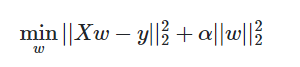

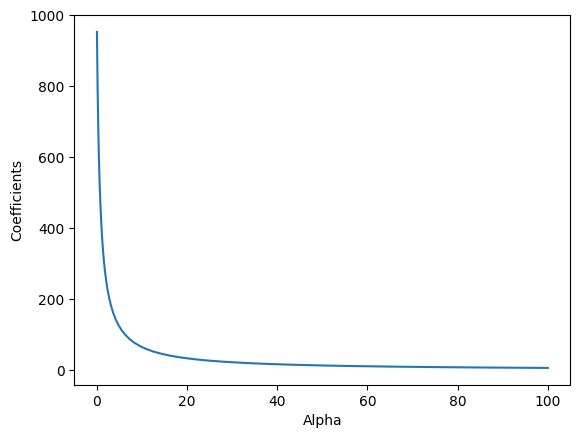

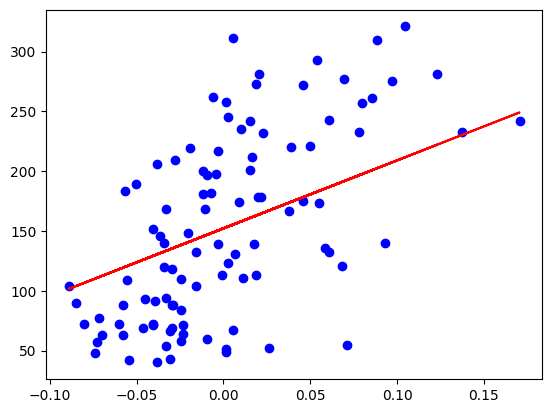

In [1]:
from sklearn import linear_model, datasets
from matplotlib import pyplot as plt 
import numpy as np

data_x, data_y = datasets.load_diabetes(return_X_y = True)
data_x = data_x[:, np.newaxis, 2]

data_x_train = data_x[:-100]
data_x_test = data_x[-100:]

data_y_train = data_y[:-100]
data_y_test = data_y[-100:]

numbers_alpha = 200 
alphas = np.logspace(-10, 2, numbers_alpha)           # Trả về 200 số cách đều nhau trên thang đo log, từ 10^{start} đến 10^{end}

# Coefficients
coefficients = []
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha)
    ridge.fit(data_x_train, data_y_train)
    coefficients.append(ridge.coef_)


ridges = linear_model.Ridge(alpha = 0.5)
ridges.fit(data_x_train, data_y_train)
ridges_pred = ridges.predict(data_x_test)



# Draw
plt.plot(alphas, coefficients)
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.show()

ax = plt.gca()
ax.scatter(data_x_test, data_y_test, color = 'blue')
ax.plot(data_x_test, ridges_pred, color = 'red')
plt.show()

# 3. Lasso: 

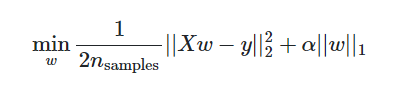

# 4. Elastic-Net: 
Nó train cả l1 và l2. Sự kết hợp này cho phép học 1 mô hình thưa thớt như Lasso, nhưng vẫn duy trì các thuộc tính chính quy như Ridge. ENet useful khi các features có mối quan hệ với nhau, ví dụ như Lasso thường chọn random 1 trong số chúng, còn Enet chọn cả. Ở đây train alpha và l1_ratio (p)

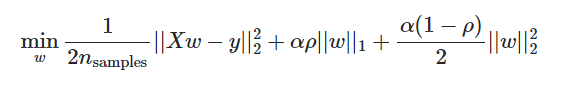

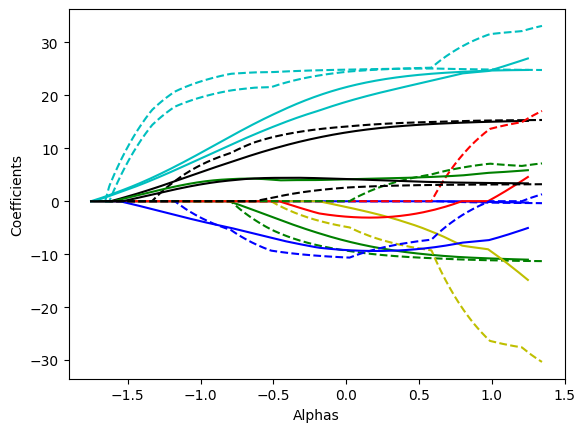

In [2]:
from itertools import cycle
from sklearn import datasets
from sklearn.linear_model import enet_path, lasso_path
import matplotlib.pyplot as plt
import numpy as np 

data_x, data_y = datasets.load_diabetes(return_X_y=True)
data_x /= data_x.std(axis = 0)

eps = 1e-3

n_alphas = 1000
alphas_lasso, coefs_lasso,_ = lasso_path(data_x, data_y, eps=eps, n_alphas= n_alphas)
alphas_enet, coefs_enet, _ = enet_path(data_x, data_y, l1_ratio=0.8, eps=eps, n_alphas= n_alphas)

color = cycle(["b", "g", "c", "k", "y", "r"])

# Hàm zip dùng để nối theo thứ tự các danh sách: ds1[0]-ds2[0]-ds3[0]

regul_alphas_enet = -np.log10(alphas_enet)         # Chuẩn hóa alphas, từ các giá trị (0,1) sang [a, b]
regul_alphas_lasso = -np.log10(alphas_lasso)
for i, coef_lasso, coef_enet in zip(color, coefs_lasso, coefs_enet):
    l1 = plt.plot(regul_alphas_enet, coef_enet, color = i)
    l2 = plt.plot(regul_alphas_lasso, coef_lasso, '--', color = i)
plt.xlabel("Alphas")
plt.ylabel("Coefficients")
plt.show()


# 5. Bayesian Regression:
Phương pháp này thì regularization parameter được điều chỉnh theo dữ liệu hiện có, ko cố định. VD với l2 trong Ridge, thì <=> tính w theo lambda cố định. Còn đây thì lambda coi như BNN đc tính từ data.
- Ta giả định y là phân phối Gauss xung quanh Xw, tức :

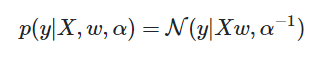  (Xw là kỳ vọng, alpha là BNN được tính từ data)

- Phân phối trên là những thông tin ta biết trước về w, và đgl "prior"

5.1 Bayesian Ridge Reg: prior của alpha và lambda đc chọn bởi phân phối Gamma (các thông số của pp thường là default), còn prior của w được xác định: 

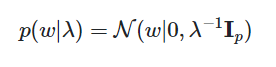

- Ta sẽ trình bày bài toán Curve fitting with a polynomial (khớp đcong với đa thức). Việc lựa chọn giá trị ban đầu của alpha, lambda là quan trọng



In [4]:
# Tạo data với lỗi (noise)
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import BayesianRidge

def func(x):
    return np.sin(2* np.pi * x)
n = int(input())
for i in range(10, n):
    size = i                # Với mỗi size thì cái đồ thị thay đổi, có 1 vài giá trị sẽ thay đổi rất nhiều, và tùy vào size thì các hệ số ở 2 TH có thể khác hoặc giống
    rands = np.random.RandomState(1234) # RandomState là để tạo seeding, uniform là phân phối đều
    data_x_train_noise = rands.uniform(0.0, 1.0, size)
    data_y_train = func(data_x_train_noise) + rands.normal(scale=0.1, size = size)     # 0.1 là độ lệch chuẩn
    data_x_test_noise = np.linspace(0.0, 1.0, 100)        # Trả về c số cách đều nhau trong khoảng [a, b]


    # Fit data với đa thức bậc k
    k = 4
    data_x_train = np.vander(data_x_train_noise, k, increasing=True)
    data_x_test = np.vander(data_x_test_noise, k, increasing=True)
    reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

    # Vẽ
    fig, axes = plt.subplots(1, 2, figsize = (10, 5))  # Just create 2 chart in 2 columms
    for i, ax in enumerate(axes):            # VD a = ['a', 'b', 'c'] thì enumerate(a) trả về [(0,'a'), (1,'b'), (2,'c')]
        if i == 0:
            init = [1 / np.var(data_y_train), 1.0]
        elif i == 1:
            init = [1.0, 1e-3]
            reg.set_params(alpha_init=init[0], lambda_init=init[1])         # Đại khái là thay đổi giá trị alpha, lambda default của thư viện
        reg.fit(data_x_train, data_y_train)
        y_mean, y_std = reg.predict(data_x_test, return_std=True) # Trả về kỳ vọng và độ lệch chuẩn

        ax.plot(data_x_test_noise, func(data_x_test_noise), color = 'r', label = "Sin($2\\pi x$)")
        ax.scatter(data_x_train_noise, data_y_train, s = 50, alpha = 0.5, label = "Observation")
        ax.plot(data_x_test_noise, y_mean, color = "blue", label = "Predict mean")
        ax.fill_between(data_x_test_noise, y_mean - y_std, y_mean + y_std, color = "pink", alpha = 0.5, label = "Predict standard deviation")
        ax.set_ylim(-2, 2)              # Giới hạn trục y 
        ax.legend()         # Thêm chú thích 
        title = f"$\\alpha$_init$={init[0]},\\ \\lambda$_init$={init[1]}$"
        if i == 0:
            title += " (Default)"
        ax.set_title(title, fontsize=12)
        text = f"$\\alpha={reg.alpha_}$\n$\\lambda={reg.lambda_}$\n$L={reg.scores_[-1]}$"
        ax.text(0.05, -1.0, text, fontsize=12)

    plt.tight_layout()
    plt.show()

# 6. Logistic regression: 
Phương pháp này thường dùng để phân loại thay vì hồi quy. Cái này yêu cầu các classes là gần phân tách tuyến tính (tức chỉ có vài điểm phá vỡ tính chất đó):

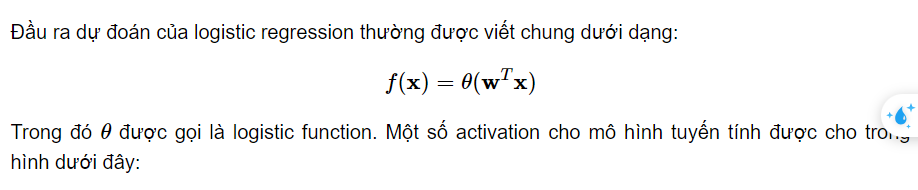

6.1 Ta xét bài toán multi-class classification sử dụng One-vs-Rest Logistic reg. Phương pháp này cụ thể:
- Nếu có C classes, ta xây dựng C classifiers (C phân loại), mỗi phân loại tương ứng với 1 class. VD: Classifiers 1 phân biệt "class 1" với "not class 1". Kết quả cuối cùng xđ = cách xem 1 điểm có xác suất rơi vào class nào cao nhất



6.2 Ta xét so sánh $l_1,  l_2-norm$, ENet về độ thưa (sparsity, tỷ lệ các hệ số  = 0) trong logistic regression, cho các giá trị khác nhau của C (C là 1 siêu tham số kiểm soát cường độ(strength) chính quy hóa). Tức, C nhỏ thì chính quy hóa mạnh, model đơn giản, từ đó độ thưa cao hơn; còn C lớn thì mô hình phức tạp hơn, độ thưa giảm.




6.3 Binary Case: ta giả sử rằng $y_i$ nhận giá trị $\in$ {0, 1}. Khi đó, xác suất $P(y_i = 1 | X_i) $được xác định = $\dfrac{1}{1 + exp(-X_iw - w_0)}$
- Như bài toán tối ưu, ta đi cực tiểu hóa hàm chi phí (cost func) sau: 

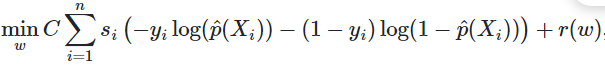

Ở đây ta có thể lựa chọn hàm $r(w)$ là: None, l1, l2, Elastic-Net,...

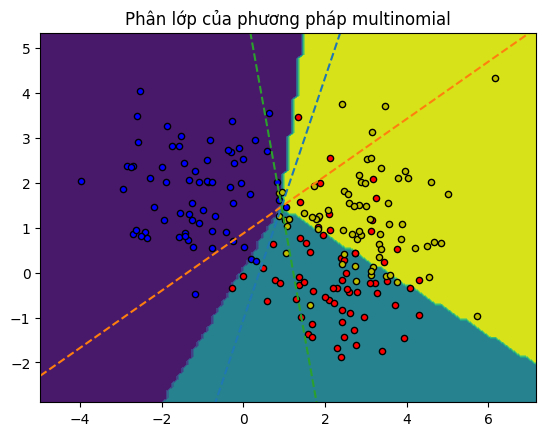

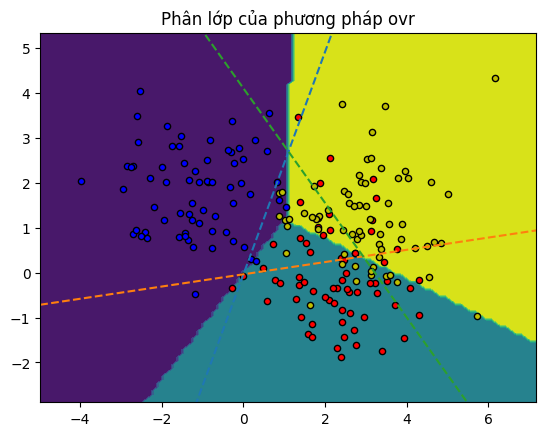

In [5]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs                     # Thư viện tạo các điểm để phân cụm
from sklearn.inspection import DecisionBoundaryDisplay

centers = [[-1, 2], [2, 0], [3, 1]]
data_x, data_y = make_blobs(n_samples=200, centers= centers, random_state=100)
for i in ("multinomial", "ovr"):
    reg = LogisticRegression(tol=1e-3, random_state=100,solver='sag', max_iter=200, multi_class=i)
    reg.fit(data_x, data_y)
    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(reg, data_x, response_method='predict', ax = ax)

    plt.title(f"Phân lớp của phương pháp {i}")
    plt.axis("tight")                                   # Hàm này để chỉnh cho miền fit với cả đồ thị, nếu ko có thì in ra đồ thị trắng nhiều
    colors = "bry"
    for i, c in zip(reg.classes_, colors):
        index = np.where(data_y==i)
        plt.scatter(data_x[index, 0], data_x[index, 1], color = c,  s = 20, edgecolors="black")         # Lấy hết 1 cột 0, 1
    
    ymin, ymax = plt.ylim()
    xmin, xmax = plt.xlim()
    coef = reg.coef_
    intercept = reg.intercept_

    def hyperplanes(i, color):
        def line(x):
            return (-x*coef[i, 0] - intercept[i])/coef[i, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)], '--')
    

    for color, i in zip(colors, reg.classes_):
        hyperplanes(i, color)


plt.show()

# 7. Linear and Quandratic Discriminant Analysis 
Là 2 phương pháp phân loại cổ điển. Điểm mạnh là dễ tính toán, được CM là hoạt động tốt trong thực tế, ko có siêu tham số (hyperparameters) để điều chỉnh.

Giảm chiều bằng cách sử dụng Linear Discriminant Analysis: kích thước đầu ra nhất thiết < số lượng lớp. Bài dưới đây sử dụng pp LDA trong việc giảm kích thước 1 tập data. Thì, LDA cố gắng xác định các thuộc tính có khác biệt lớn nhất giữa các lớp, sử dụng các nhãn lớp đã biết

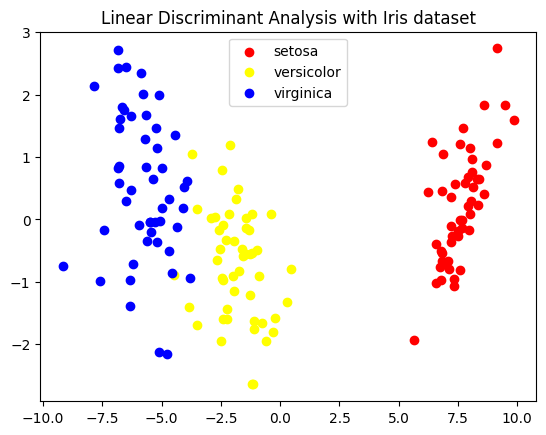

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 


data_x, data_y = datasets.load_iris(return_X_y=True)        # Default = false, Return = True thì nó trả về (data, target)
iris_name = datasets.load_iris().target_names               # load_iris là 1 bộ dataset có sẵn của thư viện

lda = LinearDiscriminantAnalysis()

data_x_fit = lda.fit(data_x, data_y).transform(data_x)

plt.figure()
colors = ["red", "yellow", "blue"]
for color, i, name in zip(colors, [0, 1, 2], iris_name):
    plt.scatter(data_x_fit[data_y == i, 0], data_x_fit[data_y == i, 1], color = color, label = name)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("Linear Discriminant Analysis with Iris dataset")
plt.show()

# Pipeline trong IT: 
- Thuật ngữ "pipeline" (đường ống) chỉ 1 quy trình tự động hoặc chuỗi các công việc thực hiện tuần tự để xử lý dữ liệu, tác vụ. Mỗi pipeline gồm các gđ, mỗi gđ thực hiện 1 tác vụ cụ thể.
VD: Trong pt phần mềm, một pipeline có thể liên quan đến quy trình bao gồm các bước như: kiểm tra mã nguồn, biên dịch, kiểm thử tự động, triển khai và kiểm tra,..Trong phân tích dữ liệu, Pipeline có thể gồm các bước: tiền xử lý, khám phá, biến đổi và trực quan hóa,...

- Qua tổ chức các bước công việc thành một pipeline, người ta có thể tăng tính tự động, hiệu quả và nhất quán trong quy trình xử lý dữ liệu và thông tin.

- Sklearn pipeline cho phép kết hợp nhiều bước xử lý dữ liệu và mô hình hóa thành một luồng công việc duy nhất, giúp tiết kiệm thời gian và giảm thiểu lỗi.

- 1 Sklearn Pipeline được xây dựng từ một chuỗi các bước. Mỗi bước trong Pipeline có thể là một bộ biến đổi dữ liệu (như chuẩn hóa, rời rạc hóa, rút trích đặc trưng) hoặc một mô hình học máy (như mô hình hồi quy, mô hình phân loại). Dữ liệu đầu vào sẽ được chuyển qua từng bước, kết quả của bước trước đó sẽ là đầu vào cho bước tiếp theo.